In [456]:
import os
import pandas as pd

input_file_path = r"C:\Users\Deshan\Documents\IIT LECS\DSGP Models\ebd_LK-33_revbul_202001_202412_unv_smp_relDec-2024.txt"
output_file_path = r"C:\Users\Deshan\Documents\IIT LECS\DSGP Models\revbul_2020-2024.csv"

try:
    df = pd.read_csv(input_file_path, sep="\t", header=0, low_memory=False)
    df.to_csv(output_file_path, index=False)

    print(f"Raw dataset saved successfully at {output_file_path}")
    
except Exception as e:
    print(f"An error occurred: {e}")


Raw dataset saved successfully at C:\Users\Deshan\Documents\IIT LECS\DSGP Models\revbul_2020-2024.csv


In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\Deshan\Documents\IIT LECS\DSGP Models\revbul_2020-2024.csv"

df = pd.read_csv(file_path)

df.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS896445761,2024-02-12 05:44:39.559593,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,4.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS871512587,2023-10-22 20:02:08.392561,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,8.0,1,G5571427,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS895248277,2023-10-22 03:23:27.253955,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,4.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS960622181,2023-10-22 20:00:25.870217,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,8.0,1,G5571427,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS873534076,2023-10-22 20:00:03.40601,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,2.0,0,NaN,0,1,0,NaN,NaN,Red-vented bulbul,NaN


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GLOBAL UNIQUE IDENTIFIER    3347 non-null   object 
 1   LAST EDITED DATE            3347 non-null   object 
 2   TAXONOMIC ORDER             3347 non-null   int64  
 3   CATEGORY                    3347 non-null   object 
 4   TAXON CONCEPT ID            3347 non-null   object 
 5   COMMON NAME                 3347 non-null   object 
 6   SCIENTIFIC NAME             3347 non-null   object 
 7   SUBSPECIES COMMON NAME      0 non-null      float64
 8   SUBSPECIES SCIENTIFIC NAME  0 non-null      float64
 9   EXOTIC CODE                 0 non-null      float64
 10  OBSERVATION COUNT           3347 non-null   object 
 11  BREEDING CODE               28 non-null     object 
 12  BREEDING CATEGORY           28 non-null     object 
 13  BEHAVIOR CODE               28 no

To understand categorical features

In [459]:
for col in df.select_dtypes(include='object').columns: # to understand categorical features
    print(col)
    print(df[col].unique())

GLOBAL UNIQUE IDENTIFIER
['URN:CornellLabOfOrnithology:EBIRD:OBS896445761'
 'URN:CornellLabOfOrnithology:EBIRD:OBS871512587'
 'URN:CornellLabOfOrnithology:EBIRD:OBS895248277' ...
 'URN:CornellLabOfOrnithology:EBIRD:OBS959118899'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1036857913'
 'URN:CornellLabOfOrnithology:EBIRD:OBS2324833495']
LAST EDITED DATE
['2024-02-12 05:44:39.559593' '2023-10-22 20:02:08.392561'
 '2023-10-22 03:23:27.253955' ... '2022-01-29 07:13:19.083499'
 '2022-01-29 07:13:37.885998' '2024-08-02 10:34:42.441043']
CATEGORY
['species']
TAXON CONCEPT ID
['avibase-95F3F185']
COMMON NAME
['Red-vented Bulbul']
SCIENTIFIC NAME
['Pycnonotus cafer']
OBSERVATION COUNT
['X' '5' '1' '4' '18' '6' '10' '2' '8' '15' '3' '9' '7' '12' '13' '25'
 '20' '40' '11' '24' '16' '14' '21' '30' '27' '17' '90' '65' '36' '31'
 '23' '35' '29' '19' '500' '100' '50' '48' '28' '45' '26' '42' '32' '47'
 '34' '80' '120' '22' '150' '60' '33' '56' '38' '49' '39' '55']
BREEDING CODE
[nan 'CN' 'H ' 'S ' 'P ' 'FY

To identify categories in categorical variables

In [460]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['OBSERVATION COUNT']))]
categorical_features

for feature in categorical_features:
    print('For feature, {} , it has {} categories'.format(feature,len(df[feature].unique())))

For feature, GLOBAL UNIQUE IDENTIFIER , it has 3347 categories
For feature, LAST EDITED DATE , it has 2915 categories
For feature, CATEGORY , it has 1 categories
For feature, TAXON CONCEPT ID , it has 1 categories
For feature, COMMON NAME , it has 1 categories
For feature, SCIENTIFIC NAME , it has 1 categories
For feature, BREEDING CODE , it has 6 categories
For feature, BREEDING CATEGORY , it has 4 categories
For feature, BEHAVIOR CODE , it has 6 categories
For feature, COUNTRY , it has 1 categories
For feature, COUNTRY CODE , it has 1 categories
For feature, STATE , it has 1 categories
For feature, STATE CODE , it has 1 categories
For feature, COUNTY , it has 10 categories
For feature, COUNTY CODE , it has 10 categories
For feature, IBA CODE , it has 4 categories
For feature, LOCALITY , it has 663 categories
For feature, LOCALITY ID , it has 715 categories
For feature, LOCALITY TYPE , it has 2 categories
For feature, OBSERVATION DATE , it has 973 categories
For feature, TIME OBSERVAT

To get a rough idea of the relationship between target variable and the categorical variables

In [461]:
for categorical_feature in categorical_features:
    print(df.groupby(['OBSERVATION COUNT',categorical_feature]).size())

OBSERVATION COUNT  GLOBAL UNIQUE IDENTIFIER                       
1                  URN:CornellLabOfOrnithology:EBIRD:OBS1005953088    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1006943142    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1007004177    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1008921553    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1010372398    1
                                                                     ..
X                  URN:CornellLabOfOrnithology:EBIRD:OBS993253671     1
                   URN:CornellLabOfOrnithology:EBIRD:OBS997438006     1
                   URN:CornellLabOfOrnithology:EBIRD:OBS997438071     1
                   URN:CornellLabOfOrnithology:EBIRD:OBS998505492     1
                   URN:CornellLabOfOrnithology:EBIRD:OBS998505562     1
Length: 3347, dtype: int64
OBSERVATION COUNT  LAST EDITED DATE          
1                  2022-01-29 07:08:27.105678    1
                 

To understand numerical variables

In [462]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['OBSERVATION COUNT']))]
print('There are ', len(numerical_features), 'numerical variables')

# visualising
df[numerical_features].head()

There are  20 numerical variables


,TAXONOMIC ORDER,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,AGE/SEX,BCR CODE,USFWS CODE,ATLAS BLOCK,LATITUDE,LONGITUDE,DURATION MINUTES,EFFORT DISTANCE KM,EFFORT AREA HA,NUMBER OBSERVERS,ALL SPECIES REPORTED,HAS MEDIA,APPROVED,REVIEWED,REASON,Unnamed: 49
0,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.097799,80.962200,360.0,8.047,NaN,4.0,1,0,1,0,NaN,NaN
1,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.097799,80.962200,120.0,2.000,NaN,8.0,1,0,1,0,NaN,NaN
2,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.090612,80.935412,300.0,3.219,NaN,4.0,1,0,1,0,NaN,NaN
3,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.097799,80.962200,120.0,2.000,NaN,8.0,1,0,1,0,NaN,NaN
4,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.087528,80.946806,236.0,4.345,NaN,2.0,0,0,1,0,NaN,NaN


To get a idea of the target variable

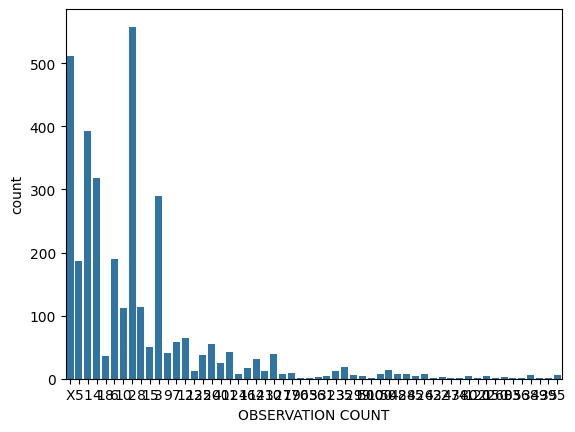

In [463]:
sns.countplot(x='OBSERVATION COUNT',data=df)
plt.show()

In [464]:
df['OBSERVATION COUNT'].groupby(df['OBSERVATION COUNT']).count()

OBSERVATION COUNT
1      393
10     112
100      8
11      42
12      64
120      1
13      12
14      31
15      50
150      1
16      17
17       9
18      36
19       4
2      558
20      55
21      12
22       5
23      12
24       8
25      38
26       7
27       7
28       8
29       6
3      289
30      39
31       4
32       2
33       1
34       1
35      19
36       2
38       6
39       1
4      318
40      25
42       1
45       4
47       1
48       7
49       1
5      187
50      14
500      1
55       6
56       1
6      189
60       3
65       1
7       58
8      113
80       5
9       40
90       1
X      511
Name: OBSERVATION COUNT, dtype: int64

To find features with missing values

In [465]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

SUBSPECIES COMMON NAME 1.0  % missing values
SUBSPECIES SCIENTIFIC NAME 1.0  % missing values
EXOTIC CODE 1.0  % missing values
BREEDING CODE 0.9916  % missing values
BREEDING CATEGORY 0.9916  % missing values
BEHAVIOR CODE 0.9916  % missing values
AGE/SEX 1.0  % missing values
IBA CODE 0.7371  % missing values
BCR CODE 1.0  % missing values
USFWS CODE 1.0  % missing values
ATLAS BLOCK 1.0  % missing values
TIME OBSERVATIONS STARTED 0.006  % missing values
DURATION MINUTES 0.0242  % missing values
EFFORT DISTANCE KM 0.1948  % missing values
EFFORT AREA HA 0.9994  % missing values
NUMBER OBSERVERS 0.0078  % missing values
GROUP IDENTIFIER 0.6005  % missing values
REASON 1.0  % missing values
TRIP COMMENTS 0.942  % missing values
SPECIES COMMENTS 0.9836  % missing values
Unnamed: 49 1.0  % missing values
No missing value found


To identify features with on values

In [466]:
for column in df.columns:
    print(column,df[column].nunique())

GLOBAL UNIQUE IDENTIFIER 3347
LAST EDITED DATE 2915
TAXONOMIC ORDER 1
CATEGORY 1
TAXON CONCEPT ID 1
COMMON NAME 1
SCIENTIFIC NAME 1
SUBSPECIES COMMON NAME 0
SUBSPECIES SCIENTIFIC NAME 0
EXOTIC CODE 0
OBSERVATION COUNT 56
BREEDING CODE 5
BREEDING CATEGORY 3
BEHAVIOR CODE 5
AGE/SEX 0
COUNTRY 1
COUNTRY CODE 1
STATE 1
STATE CODE 1
COUNTY 10
COUNTY CODE 10
IBA CODE 3
BCR CODE 0
USFWS CODE 0
ATLAS BLOCK 0
LOCALITY 663
LOCALITY ID 715
LOCALITY TYPE 2
LATITUDE 701
LONGITUDE 703
OBSERVATION DATE 973
TIME OBSERVATIONS STARTED 646
OBSERVER ID 664
SAMPLING EVENT IDENTIFIER 3347
PROTOCOL TYPE 5
PROTOCOL CODE 5
PROJECT CODE 1
DURATION MINUTES 413
EFFORT DISTANCE KM 1076
EFFORT AREA HA 2
NUMBER OBSERVERS 19
ALL SPECIES REPORTED 2
GROUP IDENTIFIER 464
HAS MEDIA 2
APPROVED 1
REVIEWED 1
REASON 0
TRIP COMMENTS 162
SPECIES COMMENTS 12
Unnamed: 49 0


Copying the dataframe

In [467]:
df2=df.copy()
df2.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS896445761,2024-02-12 05:44:39.559593,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,4.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS871512587,2023-10-22 20:02:08.392561,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,8.0,1,G5571427,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS895248277,2023-10-22 03:23:27.253955,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,4.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS960622181,2023-10-22 20:00:25.870217,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,8.0,1,G5571427,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS873534076,2023-10-22 20:00:03.40601,24523,species,avibase-95F3F185,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,2.0,0,NaN,0,1,0,NaN,NaN,Red-vented bulbul,NaN


In [468]:
df2.shape

(3347, 50)

Droping features with missing values and features with only one values

In [469]:
df2.drop(['GLOBAL UNIQUE IDENTIFIER'],axis=1, inplace=True)

In [470]:
df2.drop(['LAST EDITED DATE'],axis=1, inplace=True)

In [471]:
df2.drop(['TAXONOMIC ORDER'],axis=1, inplace=True)

In [472]:
df2.drop(['CATEGORY'],axis=1, inplace=True)

In [473]:
df2.drop(['TAXON CONCEPT ID'],axis=1, inplace=True)

In [474]:
df2.drop(['COMMON NAME'],axis=1, inplace=True)

In [475]:
df2.drop(['SCIENTIFIC NAME'],axis=1, inplace=True)

In [476]:
df2.drop(['SUBSPECIES COMMON NAME'],axis=1, inplace=True)

In [477]:
df2.drop(['SUBSPECIES SCIENTIFIC NAME'],axis=1, inplace=True)

In [478]:
df2.drop(['EXOTIC CODE'],axis=1, inplace=True)

In [479]:
df2.drop(['BREEDING CODE'],axis=1, inplace=True)

In [480]:
df2.drop(['BREEDING CATEGORY'],axis=1, inplace=True)

In [481]:
df2.drop(['BEHAVIOR CODE'],axis=1, inplace=True)

In [482]:
df2.drop(['AGE/SEX'],axis=1, inplace=True)

In [483]:
df2.drop(['COUNTRY'],axis=1, inplace=True)

In [484]:
df2.drop(['COUNTRY CODE'],axis=1, inplace=True)

In [485]:
df2.drop(['STATE'],axis=1, inplace=True)

In [486]:
df2.drop(['STATE CODE'],axis=1, inplace=True)

In [487]:
df2.drop(['COUNTY CODE'],axis=1, inplace=True)

In [488]:
df2.drop(['IBA CODE'],axis=1, inplace=True)

In [489]:
df2.drop(['BCR CODE'],axis=1, inplace=True)

In [490]:
df2.drop(['USFWS CODE'],axis=1, inplace=True)

In [491]:
df2.drop(['ATLAS BLOCK'],axis=1, inplace=True)

In [492]:
df2.drop(['LOCALITY TYPE'],axis=1, inplace=True)

In [493]:
df2.drop(['LOCALITY ID'],axis=1, inplace=True)

In [494]:
df2.drop(['OBSERVER ID'],axis=1, inplace=True)

In [495]:
df2.drop(['SAMPLING EVENT IDENTIFIER'],axis=1, inplace=True)

In [496]:
df2.drop(['PROTOCOL TYPE'],axis=1, inplace=True)

In [497]:
df2.drop(['PROTOCOL CODE'],axis=1, inplace=True)

In [498]:
df2.drop(['PROJECT CODE'],axis=1, inplace=True)

In [499]:
df2.drop(['DURATION MINUTES'],axis=1, inplace=True)

In [500]:
df2.drop(['EFFORT DISTANCE KM'],axis=1, inplace=True)

In [501]:
df2.drop(['EFFORT AREA HA'],axis=1, inplace=True)

In [502]:
df2.drop(['NUMBER OBSERVERS'],axis=1, inplace=True)

In [503]:
df2.drop(['ALL SPECIES REPORTED'],axis=1, inplace=True)

In [504]:
df2.drop(['GROUP IDENTIFIER'],axis=1, inplace=True)

In [505]:
df2.drop(['HAS MEDIA'],axis=1, inplace=True)

In [506]:
df2.drop(['APPROVED'],axis=1, inplace=True)

In [507]:
df2.drop(['REVIEWED'],axis=1, inplace=True)

In [508]:
df2.drop(['REASON'],axis=1, inplace=True)

In [509]:
df2.drop(['TRIP COMMENTS'],axis=1, inplace=True)

In [510]:
df2.drop(['SPECIES COMMENTS'],axis=1, inplace=True)

In [511]:
df2.drop(['Unnamed: 49'],axis=1, inplace=True)

In [512]:
df3 = df2.copy()

print(df3.columns)

Index(['OBSERVATION COUNT', 'COUNTY', 'LOCALITY', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED'],
      dtype='object')


In [513]:
# exporting the DataFrame to a CSV file
new_output = r"C:\Users\Deshan\Documents\IIT LECS\DSGP Models\new_updated_dataset.csv"


df3.to_csv(new_output, index=False)

print("Dataset successfully saved")


Dataset successfully saved


In [514]:
import pandas as pd
df3 = df2.copy()

# correct format for 'OBSERVATION DATE'
df3['OBSERVATION DATE'] = pd.to_datetime(df3['OBSERVATION DATE'], errors='coerce')

df3['TIME OBSERVATIONS STARTED'] = pd.to_datetime(df3['TIME OBSERVATIONS STARTED'], format='%H:%M:%S', errors='coerce').dt.time

# 'OBSERVATION DATE' and 'TIME OBSERVATIONS STARTED' into a single datetime column
df3['DATETIME'] = pd.to_datetime(df3['OBSERVATION DATE'].astype(str) + ' ' + df3['TIME OBSERVATIONS STARTED'].astype(str), errors='coerce')

df3['Year'] = df3['DATETIME'].dt.year
df3['Month'] = df3['DATETIME'].dt.month
df3['Day'] = df3['DATETIME'].dt.day
df3['Day_of_Week'] = df3['DATETIME'].dt.dayofweek  # Monday=0, Sunday=6
df3['Hour'] = df3['DATETIME'].dt.hour

df3['Year'] = df3['Year'].astype('Int64')
df3['Month'] = df3['Month'].astype('Int64')
df3['Day'] = df3['Day'].astype('Int64')
df3['Day_of_Week'] = df3['Day_of_Week'].astype('Int64')
df3['Hour'] = df3['Hour'].astype('Int64')

df3['OBSERVATION COUNT'] = pd.to_numeric(df3['OBSERVATION COUNT'], errors='coerce')  # Converts 'X' to NaN

df3['OBSERVATION COUNT'] = df3['OBSERVATION COUNT'].fillna(0)  # Replace NaN with 0

df3 = df3.sort_values(by='DATETIME').reset_index(drop=True)


print(df3.head())

print(df3.dtypes)


   OBSERVATION COUNT      COUNTY                          LOCALITY  LATITUDE  \
0                8.0    Tangalle  Buckingham Place Hotel, Tangalle  6.046344   
1                0.0  Hambantota              Bundala NP (General)  6.188598   
2               40.0  Hambantota              Bundala NP (General)  6.188598   
3                0.0  Hambantota              Bundala NP (General)  6.188598   
4                0.0  Hambantota             Bundala National Park  6.193055   

   LONGITUDE OBSERVATION DATE TIME OBSERVATIONS STARTED            DATETIME  \
0  80.854155       2020-01-01                  06:00:00 2020-01-01 06:00:00   
1  81.220036       2020-01-02                  06:00:00 2020-01-02 06:00:00   
2  81.220036       2020-01-03                  07:00:00 2020-01-03 07:00:00   
3  81.220036       2020-01-03                  08:51:00 2020-01-03 08:51:00   
4  81.221820       2020-01-04                  06:00:00 2020-01-04 06:00:00   

   Year  Month  Day  Day_of_Week  Hour  
0  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Columns in df3 before encoding:", df3.columns)

df3['COUNTY'] = df3['COUNTY'].fillna('Unknown')
df3['LOCALITY'] = df3['LOCALITY'].fillna('Unknown')

# OBSERVATION COUNT into a binary classification target
df3['OBSERVATION'] = np.where(df3['OBSERVATION COUNT'] > 0, 1, 0) 

# One-hot encode categorical variables
if 'COUNTY' in df3.columns and 'LOCALITY' in df3.columns:
    df3 = pd.get_dummies(df3, columns=['COUNTY', 'LOCALITY'], drop_first=False)
else:
    print("Error: COUNTY or LOCALITY columns are missing!")

features = ['Year', 'Month', 'Day', 'Day_of_Week', 'Hour', 'LATITUDE', 'LONGITUDE']

county_columns = [col for col in df3.columns if col.startswith('COUNTY_')]
locality_columns = [col for col in df3.columns if col.startswith('LOCALITY_')]
features.extend(county_columns + locality_columns)

# X (features) and y (target)
X = df3[features]  
y = df3['OBSERVATION']

# training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Columns in df3 before encoding: Index(['OBSERVATION COUNT', 'COUNTY', 'LOCALITY', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'DATETIME', 'Year',
       'Month', 'Day', 'Day_of_Week', 'Hour'],
      dtype='object')
Training Data Shape: (2677, 680)
Testing Data Shape: (670, 680)


In [516]:
# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train) 
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Training Accuracy: 0.9929
Test Accuracy: 0.8955


In [517]:
# exporting the DataFrame to a CSV file
new_output = r"C:\Users\Deshan\Documents\IIT LECS\DSGP Models\dataset_2.csv"


df3.to_csv(new_output, index=False)

print("Dataset successfully saved")


Dataset successfully saved


In [518]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.42      0.53        96
           1       0.91      0.98      0.94       574

    accuracy                           0.90       670
   macro avg       0.82      0.70      0.74       670
weighted avg       0.88      0.90      0.88       670



Predictions

In [519]:

future_data = pd.DataFrame({
    'Year': [2025] * 5, 
    'Month': [1] * 5, 
    'Day': [5, 10, 15, 20, 25],
    'Day_of_Week': [0, 5, 3, 6, 1],  # Monday, Saturday, Thursday, Sunday, Tuesday
    'Hour': [6, 7, 16, 18, 8],
    'LATITUDE': [6.188598, 6.0977986, 6.193055, 6.076261, 6.0906125],
    'LONGITUDE': [81.220036, 80.9622002, 81.221820, 80.93352, 80.9354124],
    'COUNTY': ['Ambalantota', 'Hambantota', 'Tangalle', 'Thissamaharama', 'Beliatta'],
    'LOCALITY': ['Kalametiya', 'Bundala NP', 'Yala NP', 'Turtle Bay', 'Kalametiya Road']
})


future_data = pd.get_dummies(future_data, columns=['COUNTY', 'LOCALITY'], drop_first=True)

future_data = future_data.reindex(columns=X_train.columns, fill_value=0)

future_predictions = rf.predict(future_data)

print(future_data[['Year', 'Month', 'Day', 'Hour', 'LATITUDE', 'LONGITUDE', 'Predicted Bird Presence']])


   Year  Month  Day  Hour  LATITUDE  LONGITUDE  Predicted Bird Presence
0  2025      1    5     6  6.188598  81.220036                        1
1  2025      1   10     7  6.097799  80.962200                        1
2  2025      1   15    16  6.193055  81.221820                        1
3  2025      1   20    18  6.076261  80.933520                        1
4  2025      1   25     8  6.090612  80.935412                        1


In [520]:
import pandas as pd

# April 20, 2025, at 9 AM
future_data = pd.DataFrame({
    'Year': [2025],  
    'Month': [4],  # April
    'Day': [20],  # 20th Day
    'Day_of_Week': [6],  # Sunday
    'Hour': [9]  # 9 AM
})

future_data = future_data.reindex(columns=X_train.columns, fill_value=0)

future_prediction = rf.predict(future_data)

if future_prediction[0] == 1:
    predicted_localities = X_train.filter(like='LOCALITY_').sum().sort_values(ascending=False).head(10)
    
    
    predicted_localities_df = pd.DataFrame(predicted_localities.index.str.replace('LOCALITY_', ''), columns=['Localities'])


    print(predicted_localities_df)
else:
    print("No bird presence predicted for April 20, 2025, at 9 AM.")


                                          Localities
0                       Yala National Park (General)
1                               Bundala NP (General)
2                                    Debarawewa Lake
3                           Bundala Freshwater Marsh
4                                         Tissa Lake
5                                          Yoda Lake
6               Hibiscus Garden Hotel, Tissamaharama
7                          Kalametiya Bird Sanctuary
8  Galpotta Road, Wakkariya Junction, Bandagiriya...
9  Galpottha Road, Wakkariya Junction, Badagiriya...


In [524]:
import folium
import pandas as pd

top_localities = predicted_localities_df['Localities'].tolist()

locality_columns = [col for col in df3.columns if col.startswith('LOCALITY_')]

df3['LOCALITY'] = df3[locality_columns].idxmax(axis=1).str.replace('LOCALITY_', '')

# include only top predicted localities
location_data = df3[df3['LOCALITY'].isin(top_localities)][['LOCALITY', 'LATITUDE', 'LONGITUDE']].drop_duplicates()

if location_data.empty:
    print("No matching localities found in the dataset!")
else:
    
    map_center = [location_data['LATITUDE'].mean(), location_data['LONGITUDE'].mean()]
    m = folium.Map(location=map_center, zoom_start=10)

    # markers for each predicted locality
    for _, row in location_data.iterrows():
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=f"<b>{row['LOCALITY']}</b>",
            tooltip=row['LOCALITY'],
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(m)

    
m
